In [8]:
import os
import pandas as pd


class Instacart:
    def __init__(self):
        self.data_path = 'instacart_2017_05_01'
        self.orders = None
        self.products = None
        self.order_products = None

    def load_data(self, train_only=False):
        self.orders = pd.read_csv(os.sep.join([self.data_path, 'orders.csv']))
        self.products = pd.read_csv(os.sep.join([self.data_path, 'products.csv']))
        self.order_products = pd.read_csv(os.sep.join([self.data_path, 'order_products__train.csv']))

        if train_only:
            return
        
        order_products2 = pd.read_csv(os.sep.join([self.data_path, 'order_products__prior.csv']))
        self.order_products = self.order_products.append(order_products2)

    def report_1(self, top_n=1):
        """
        Find which product is the most frequently ordered in a given hour of the day.
        Across all days, e.g. "What do people order most at 2pm?"
        """

        order_product_hour = self.orders.merge(self.order_products, on='order_id')
        order_product_hour = order_product_hour[['order_id', 'product_id', 'order_hour_of_day']]

        hour_product_count = order_product_hour.groupby(['order_hour_of_day', 'product_id']).agg('count')

        hour_count = hour_product_count.reset_index()
        hour_count = hour_count.sort_values(['order_hour_of_day', 'order_id'], ascending=[True, False])

        hour_max_count = hour_count.groupby(['order_hour_of_day']).head(top_n)
        hour_max_count = hour_max_count.merge(self.products, on='product_id')[['product_name', 'order_id']]
        hour_max_count = hour_max_count.rename(columns={'order_id': 'order_count'})

        return hour_max_count

    def report_2(self, n):
        """
Report 2:

Top n products with the shortest average re-order time

Overview:
Average re-order time for a product is determined from the "days_since_prior_order" column. This represents the days elapsed from when the user placed the same order.
Calculate the average re-order time for a product
Take top n

Deliverables:
A program that outputs the n products with the shortest average re-order times
        """

        product_days = self.orders.merge(self.order_products, on='order_id')
        product_days = product_days[['product_id', 'days_since_prior_order']]
        product_days = product_days.dropna()

        product_mean_days = product_days.groupby('product_id').agg('mean').reset_index()
        product_mean_days = product_mean_days.sort_values(['days_since_prior_order', 'product_id'])  # adding product_id sort for result consistency
        product_mean_days = product_mean_days.reset_index(drop=True)  # renumber index from 0
        product_mean_days = product_mean_days.iloc[:n]

        product_mean_days = product_mean_days.merge(self.products, on='product_id')[['product_name', 'days_since_prior_order']]
        product_mean_days = product_mean_days.rename(columns={'days_since_prior_order': 'mean_days_since_prior_order'})

        return product_mean_days


In [ ]:
x = 2 
print(x)


In [23]:
instacart = Instacart()
instacart.load_data()

In [22]:
hour_max_count = instacart.report_1(top_n=3)
hour_max_count

,product_name,order_count
0,Bag of Organic Bananas,125
1,Bag of Organic Bananas,65
2,Bag of Organic Bananas,32
3,Bag of Organic Bananas,26
4,Bag of Organic Bananas,22
5,Bag of Organic Bananas,45
6,Bag of Organic Bananas,152
7,Bag of Organic Bananas,451
8,Bag of Organic Bananas,811
9,Bag of Organic Bananas,1101


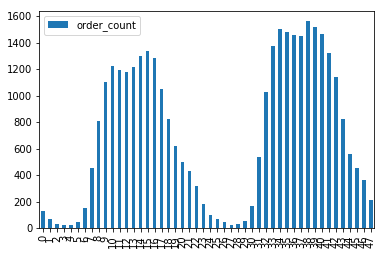

In [20]:
%matplotlib inline
hour_max_count.plot(kind='bar')

In [24]:
product_mean_days = instacart.report_2(20)
print(product_mean_days)

                                         product_name  \
0                               Organic Veggie Ground   
1                                    Blackened Turkey   
2            Organic Chocolate Mint Caffeine Free Tea   
3                    Amaretto Almond Crunch Ice Cream   
4                             Pomegranate Energy Shot   
5                                  Black Olive Spread   
6                                      7 Year Bourbon   
7                                Ear Relief Ear Drops   
8                                  10 Grain Bread Mix   
9                           Thyme & Honey Goat Cheese   
10                 Iced Green Tea Zero Calorie Citrus   
11                             White Birthday Candles   
12                                     Calimyrna Figs   
13                   Chocolate Chip Cookie & Cake Mix   
14        Single Herbs Ginkgo Leaf Dietary Supplement   
15                                  Glass Mixing Bowl   
16             Moisturizing Cre